# Le déséquilibre des classes : est-ce vraiment un problème incontournable en Machine Learning ?

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.linear_model import LogisticRegression

import seaborn as sns
sns.set()

In [2]:
colors = ['#FF7051', '#00B9FF', '#46C7C7']
labels = ["Classe majoritaire", "Classe minoritaire"]

## Dataset inséparable

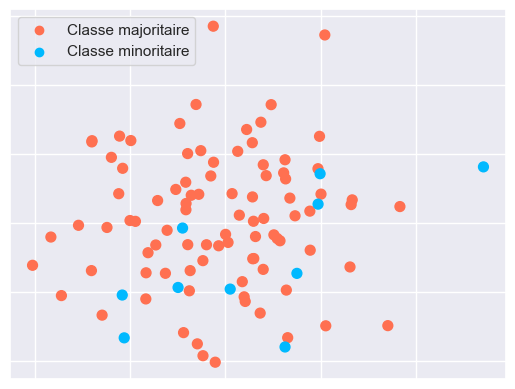

In [3]:
X1 = np.random.randn(100, 2)
y1 = np.concatenate([np.zeros(90), np.ones(10)]).astype(np.int8)

fig, ax = plt.subplots()
plt.scatter(X1[:,0], X1[:,1], c=[colors[y] for y in y1], s = 50)
plt.legend(handles=[plt.scatter([], [], c=colors[i], label=labels[i]) for i in range(len(labels))])
ax.set_yticklabels([])
ax.set_xticklabels([])
plt.show()

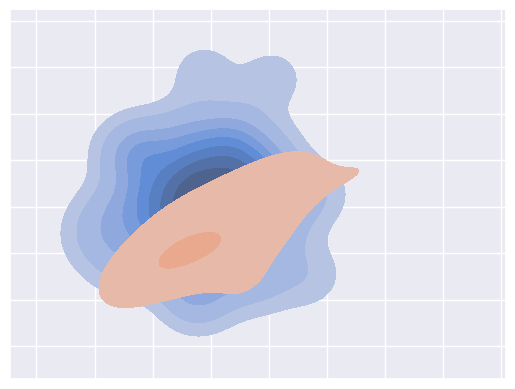

In [4]:
df = pd.DataFrame(X1, columns=['x', 'y'])
df['label'] = y1

fig, ax = plt.subplots()
sns.kdeplot(data=df, x='x', y='y', hue='label', fill=True, legend = False)
ax.set_yticklabels([])
ax.set_xticklabels([])
ax.set_xlabel(None)
ax.set_ylabel(None);

## Dataset séparable

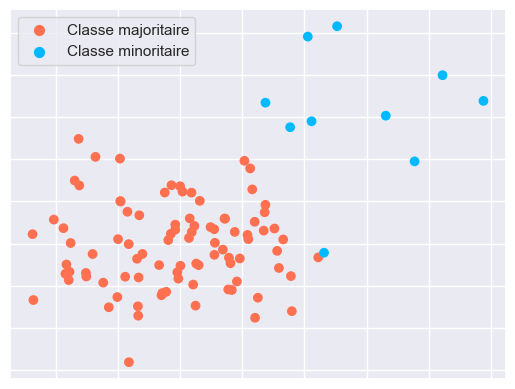

In [5]:
X2 = np.random.randn(100, 2)
y2 = np.concatenate([np.zeros(90), np.ones(10)]).astype(np.int8)
X2[90:,:] += 3

fig, ax = plt.subplots()
plt.scatter(X2[:,0], X2[:,1], c=[colors[y] for y in y2])
plt.legend(handles=[plt.scatter([], [],  s = 50,  c=colors[i], label=labels[i]) for i in range(len(labels))])
ax.set_yticklabels([])
ax.set_xticklabels([])
plt.show()

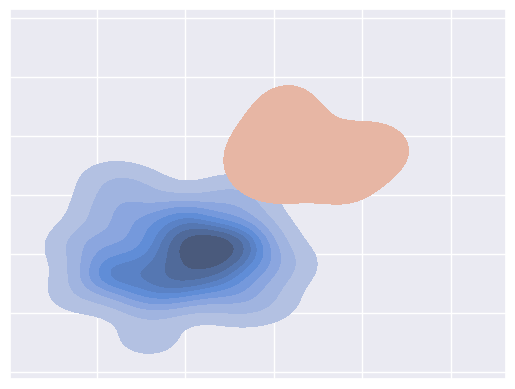

In [6]:
df = pd.DataFrame(X2, columns=['x', 'y'])
df['label'] = y2

fig, ax = plt.subplots()
sns.kdeplot(data=df, x='x', y='y', hue='label', fill=True, legend=False)
ax.set_yticklabels([])
ax.set_xticklabels([])
ax.set_xlabel(None)
ax.set_ylabel(None);

## Modèle sur un dataset séparable

In [7]:
clf = LogisticRegression().fit(X2, y2)

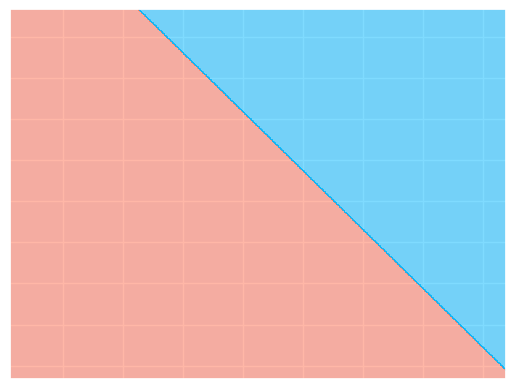

In [8]:
# Créer une grille de maillage pour générer les points à tracer
h = 0.02
x_min, x_max = X2[:, 0].min() - 0.5, X2[:, 0].max() + 0.5
y_min, y_max = X2[:, 1].min() - 0.5, X2[:, 1].max() + 0.5
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Tracer les régions de décision
# Définir les couleurs à utiliser pour la frontière de décision
colors = ['#FF7051', '#00B9FF']
cmap = ListedColormap(colors)

fig, ax = plt.subplots()
plt.contourf(xx, yy, Z, cmap=cmap, alpha=0.5)

# Définir les limites du tracé et afficher le tracé
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
ax.set_yticklabels([])
ax.set_xticklabels([])
plt.show()